In [250]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [251]:
df = pd.read_csv('H:/DAIICT/Python/HDFCBANK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,2.980,3.025,2.95,2.975,2.385947,412000.0
1,1996-01-03,2.975,2.995,2.95,2.985,2.393968,284000.0
2,1996-01-04,2.985,2.980,2.94,2.965,2.377928,282000.0
3,1996-01-05,2.965,2.980,2.95,2.960,2.373918,189000.0
4,1996-01-08,2.960,2.950,2.91,2.925,2.345848,237000.0


In [252]:
df_close_shifted = df['Close'].shift()
df['Prev_Close'] = df_close_shifted

In [253]:
df.shape

(6862, 8)

In [254]:
df.isnull().sum()

Date          0
Open          7
High          7
Low           7
Close         7
Adj Close     7
Volume        7
Prev_Close    8
dtype: int64

In [255]:
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
1,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.393968,284000.0,2.975000
2,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.377928,282000.0,2.985000
3,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.373918,189000.0,2.965000
4,1996-01-08,2.960000,2.950000,2.910000,2.925000,2.345848,237000.0,2.960000
5,1996-01-09,2.925000,2.925000,2.800000,2.830000,2.269657,483000.0,2.925000
...,...,...,...,...,...,...,...,...
6857,2023-03-27,1562.199951,1579.449951,1558.900024,1567.449951,1567.449951,15936003.0,1560.650024
6858,2023-03-28,1565.699951,1582.900024,1564.099976,1580.199951,1580.199951,19638151.0,1567.449951
6859,2023-03-29,1584.000000,1602.000000,1581.900024,1587.800049,1587.800049,19881806.0,1580.199951
6860,2023-03-31,1595.599976,1612.949951,1592.400024,1609.550049,1609.550049,17355614.0,1587.800049


In [256]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
1,1996-01-03,2.975000,2.995000,2.950000,2.985000,2.393968,284000.0,2.975000
2,1996-01-04,2.985000,2.980000,2.940000,2.965000,2.377928,282000.0,2.985000
3,1996-01-05,2.965000,2.980000,2.950000,2.960000,2.373918,189000.0,2.965000
4,1996-01-08,2.960000,2.950000,2.910000,2.925000,2.345848,237000.0,2.960000
5,1996-01-09,2.925000,2.925000,2.800000,2.830000,2.269657,483000.0,2.925000
...,...,...,...,...,...,...,...,...
6857,2023-03-27,1562.199951,1579.449951,1558.900024,1567.449951,1567.449951,15936003.0,1560.650024
6858,2023-03-28,1565.699951,1582.900024,1564.099976,1580.199951,1580.199951,19638151.0,1567.449951
6859,2023-03-29,1584.000000,1602.000000,1581.900024,1587.800049,1587.800049,19881806.0,1580.199951
6860,2023-03-31,1595.599976,1612.949951,1592.400024,1609.550049,1609.550049,17355614.0,1587.800049


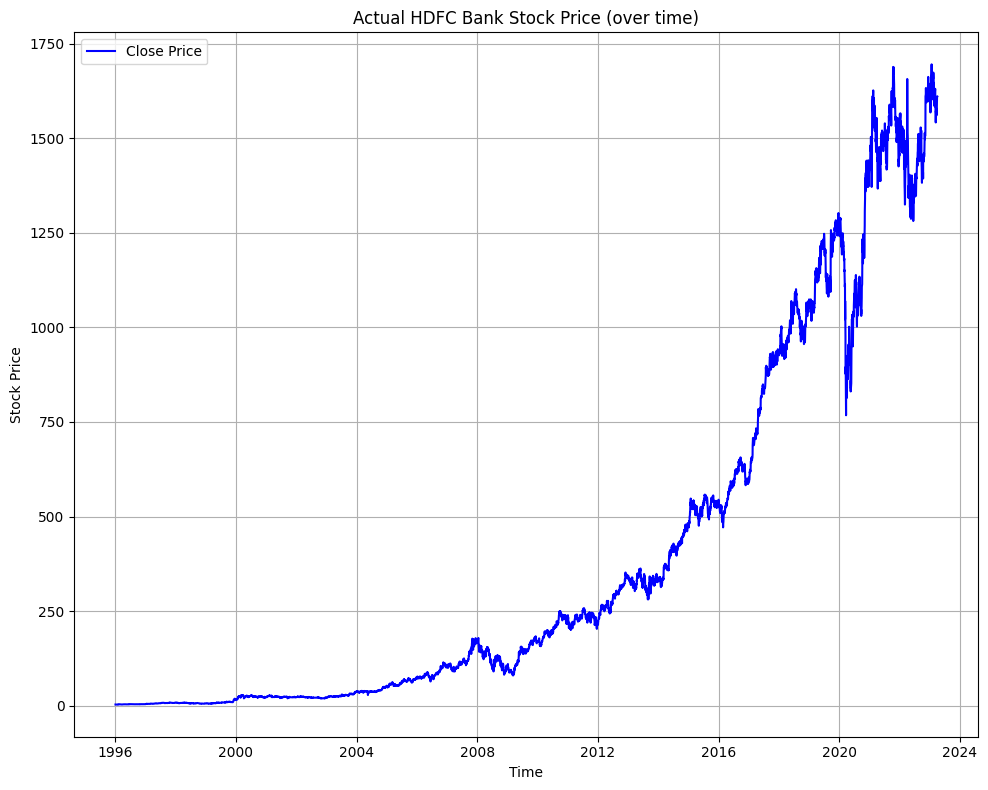

In [289]:
# Actual Close Price
plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Actual HDFC Bank Stock Price (over time)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [258]:
x = df[['Open', 'Prev_Close', 'High', 'Low', 'Volume']]
y = df['Close']

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
print(x_train.shape, x_test.shape)

(5819, 5) (1028, 5)


In [260]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [261]:
print(model.coef_)
print(model.intercept_)

[-5.70243160e-01 -2.65466822e-03  8.63273689e-01  7.08603660e-01
 -3.60916325e-08]
0.15643698236607406


In [273]:
y_pred_test = model.predict(x_test)
x_test.shape

(1028, 5)

In [274]:
y_pred_test.shape

(1028,)

In [275]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_test})
print(_df)

           Actual    Predicted
1161    25.030001    25.297309
1365    22.719999    22.920504
3236   112.720001   113.422394
1221    24.254999    24.869681
120      3.830000     3.804839
...           ...          ...
35       3.365000     3.469923
2502    66.025002    66.077697
3609   157.164993   156.118301
918      7.580000     7.696513
6590  1426.250000  1426.538681

[1028 rows x 2 columns]


In [283]:
model.score(x_test, y_test)

0.9999521626511072

In [284]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test)))

Mean Absolute Error (MAE):  1.667786769100905
Mean Squared Error (MSE):  11.828386705520112
Root Mean Squared Error (RMSE):  1.2914281896802877


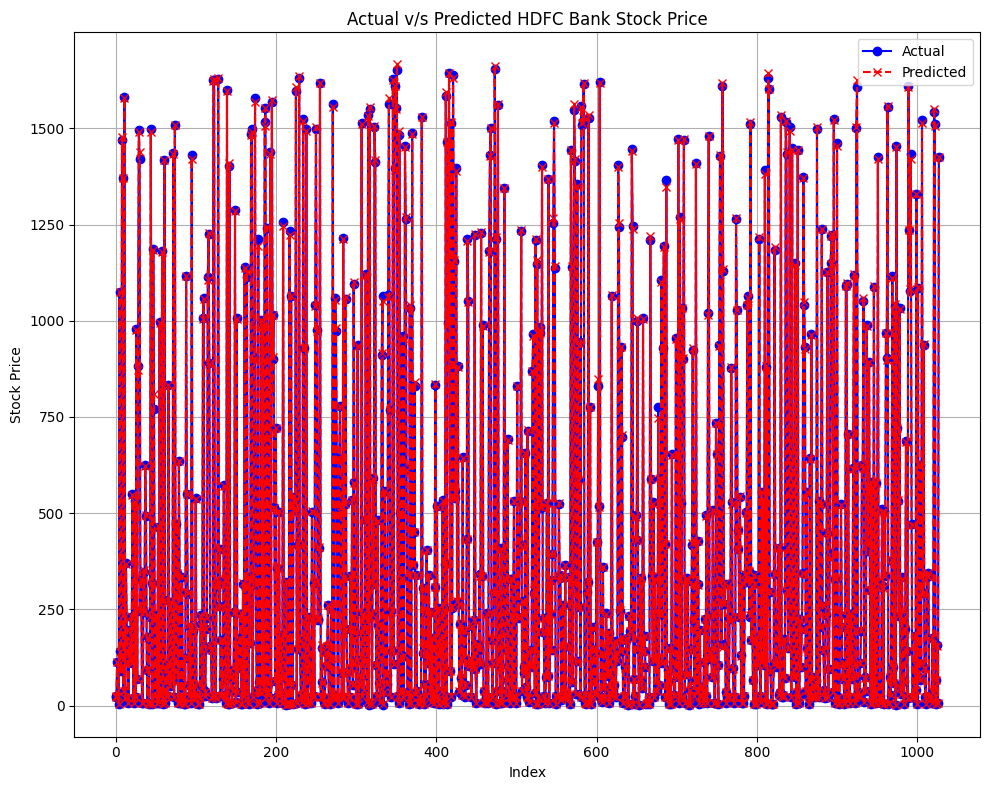

In [285]:
# Prediction on Testing set
pred = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.plot(range(len(y_test)), y_test, label="Actual", color="blue", linestyle="-", marker="o")
plt.plot(range(len(y_pred_test)), y_pred_test, label="Predicted", color="red", linestyle="--", marker="x")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.title("Actual v/s Predicted HDFC Bank Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


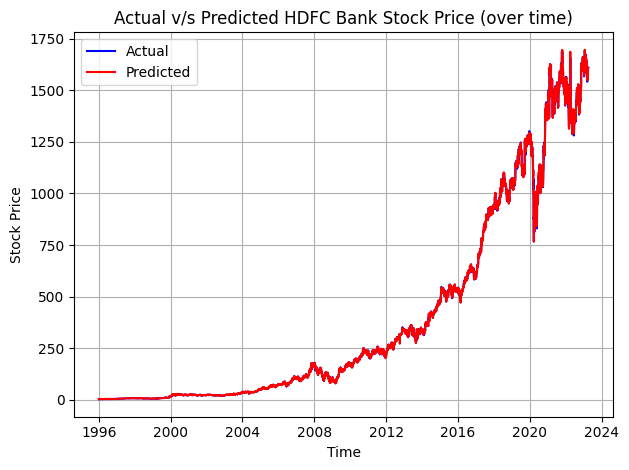

In [288]:
# Training + Testing set
y_pred_all = model.predict(x)

plt.plot(df['Date'], y, label="Actual", color='blue')
plt.plot(df['Date'], y_pred_all, label="Predicted", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual v/s Predicted HDFC Bank Stock Price (over time)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()